In [5]:
import nltk
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
import nltk
from sklearn.model_selection import StratifiedKFold



# Initialize VADER sentiment analyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

# Function to perform sentiment analysis on a text and return sentiment score
def analyze_sentiment(text):
    sentiment_scores = analyzer.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    
    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Sample movie feedback data with labels
X_train = ["This was really awesome an awesome movie",
           "Great movie! I liked it a lot",
           "Happy Ending! Awesome Acting by hero",
           "Loved it!",
           "Bad, not up to the mark",
           "Could have been better",
           "Really disappointed by the movie"]

y_train = ["positive", "positive", "positive", "positive", "negative", "negative", "negative"]

X_test = ["Really disappointed by the movie"]

# Data preprocessing
tokenizer = RegexpTokenizer(r"\w+")
en_stopwords = set(stopwords.words('english'))
ps = PorterStemmer()

def getCleanedText(text):
    text = text.lower()
    tokens = tokenizer.tokenize(text)
    new_tokens = [token for token in tokens if token not in en_stopwords]
    stemmed_tokens = [ps.stem(token) for token in new_tokens]
    clean_text = " ".join(stemmed_tokens)
    return clean_text

X_clean = [getCleanedText(i) for i in X_train]
Xt_clean = [getCleanedText(i) for i in X_test]

# TF-IDF Vectorization
tfidf = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(X_clean).toarray()
Xt_tfidf = tfidf.transform(Xt_clean).toarray()

# Multinomial Naive Bayes with Hyperparameter Tuning
from sklearn.model_selection import GridSearchCV

parameters = {'alpha': [0.1, 1.0, 10.0]}
mn = MultinomialNB()
# Define StratifiedKFold
stratified_cv = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Create GridSearchCV with StratifiedKFold
grid_search = GridSearchCV(mn, parameters, cv=stratified_cv)
grid_search.fit(X_tfidf, y_train)
best_mn = grid_search.best_estimator_

# Predict sentiment label for the test data
y_pred = best_mn.predict(Xt_tfidf)

# Analyze sentiment using the VADER sentiment analysis function
sentiment = analyze_sentiment(X_test[0])

print(f"Predicted Sentiment: {y_pred[0]}")
print(f"VADER Sentiment Analysis: {sentiment}")

# Calculate accuracy for the test data
accuracy = accuracy_score([sentiment], [y_pred[0]])
print(f"Accuracy: {accuracy}")


Predicted Sentiment: negative
VADER Sentiment Analysis: negative
Accuracy: 1.0


[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


In [20]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Sample data with feedback and given sentiment labels
data = {
    'Feedback': [
        "This movie is great!",
        "I didn't like this show at all.",
        "I have mixed feelings about it.",
        "The ending was disappointing.",
        
        "I absolutely loved it!",
        "The acting was superb.",
        "This is a masterpiece.",
        "Not worth my time.",
        "I found it boring.",
        
        "A fantastic experience!",
        "It's terrible, don't watch it.",
        
        "One of the worst movies I've seen.",
        
    ],
    'Given_Sentiment': [
        'positive', 'negative', 'neutral',  'negative', 'positive', 'positive', 'positive',
        'negative', 'negative',  'positive', 'negative',  'negative', 
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate VADER sentiment scores
df['VADER_Sentiment'] = df['Feedback'].apply(lambda x: analyzer.polarity_scores(x))

# Define a threshold for VADER sentiment classification
threshold = 0.1

# Map VADER sentiment scores to sentiment labels
df['VADER_Label'] = df['VADER_Sentiment'].apply(
    lambda x: 'positive' if x['compound'] >= threshold else ('negative' if x['compound'] <= -threshold else 'neutral')
)

# Compare VADER and Given Sentiments
df['Correct_VADER'] = df['VADER_Label'] == df['Given_Sentiment']

# Calculate accuracy
accuracy = accuracy_score(df['Given_Sentiment'], df['VADER_Label'])

# Generate confusion matrix
confusion = confusion_matrix(df['Given_Sentiment'], df['VADER_Label'])

# Display the results
print("Data with Discrepancies:")
result_columns = ['Feedback', 'Given_Sentiment', 'VADER_Label', 'Correct_VADER']
print(df[result_columns])
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:")
print(confusion)
print("\nClassification Report:")
print(classification_report(df['Given_Sentiment'], df['VADER_Label']))


Data with Discrepancies:
                              Feedback Given_Sentiment VADER_Label  \
0                 This movie is great!        positive    positive   
1      I didn't like this show at all.        negative    negative   
2      I have mixed feelings about it.         neutral     neutral   
3        The ending was disappointing.        negative    negative   
4               I absolutely loved it!        positive    positive   
5               The acting was superb.        positive    positive   
6               This is a masterpiece.        positive    positive   
7                   Not worth my time.        negative    negative   
8                   I found it boring.        negative    negative   
9              A fantastic experience!        positive    positive   
10      It's terrible, don't watch it.        negative    negative   
11  One of the worst movies I've seen.        negative    negative   

    Correct_VADER  
0            True  
1            True  
2   

Data with Discrepancies:
                              Feedback Given_Sentiment VADER_Label  \
0                 This movie is great!        positive    positive   
1      I didn't like this show at all.        negative    negative   
2      I have mixed feelings about it.         neutral     neutral   
3        The ending was disappointing.        negative    negative   
4               I absolutely loved it!        positive    positive   
5               The acting was superb.        positive    positive   
6               This is a masterpiece.        positive    positive   
7                   Not worth my time.        negative    negative   
8                   I found it boring.        negative    negative   
9              A fantastic experience!        positive    positive   
10      It's terrible, don't watch it.        negative    negative   
11  One of the worst movies I've seen.        negative    negative   

    Correct_VADER  
0            True  
1            True  
2   

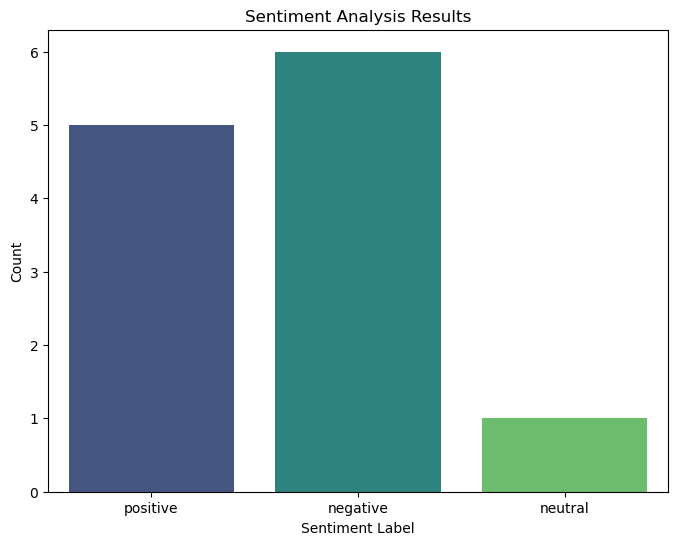

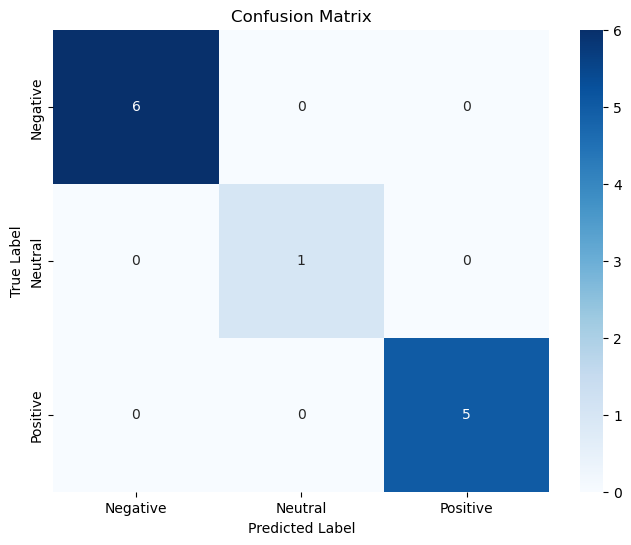

In [19]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Sample data with feedback and given sentiment labels
data = {
    
    'Feedback': [
        "This movie is great!",
        "I didn't like this show at all.",
        "I have mixed feelings about it.",
        "The ending was disappointing.",
        
        "I absolutely loved it!",
        "The acting was superb.",
        "This is a masterpiece.",
        "Not worth my time.",
        "I found it boring.",
        
        "A fantastic experience!",
        "It's terrible, don't watch it.",
        
        "One of the worst movies I've seen.",
        
    ],
    'Given_Sentiment': [
        'positive', 'negative', 'neutral',  'negative', 'positive', 'positive', 'positive',
        'negative', 'negative',  'positive', 'negative',  'negative', 
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate VADER sentiment scores
df['VADER_Sentiment'] = df['Feedback'].apply(lambda x: analyzer.polarity_scores(x))

# Define a threshold for VADER sentiment classification
threshold = 0.1

# Map VADER sentiment scores to sentiment labels
df['VADER_Label'] = df['VADER_Sentiment'].apply(
    lambda x: 'positive' if x['compound'] >= threshold else ('negative' if x['compound'] <= -threshold else 'neutral')
)

# Compare VADER and Given Sentiments
df['Correct_VADER'] = df['VADER_Label'] == df['Given_Sentiment']

# Calculate accuracy
accuracy = accuracy_score(df['Given_Sentiment'], df['VADER_Label'])

# Generate confusion matrix
confusion = confusion_matrix(df['Given_Sentiment'], df['VADER_Label'])

# Display the results
print("Data with Discrepancies:")
print(df[['Feedback', 'Given_Sentiment', 'VADER_Label', 'Correct_VADER']])
print("\nAccuracy:", accuracy)
print("\nConfusion Matrix:")
print(confusion)

# Plot a bar chart for sentiment analysis results
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='VADER_Label', palette='viridis')
plt.title("Sentiment Analysis Results")
plt.xlabel("Sentiment Label")
plt.ylabel("Count")
plt.show()

# Plot a confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from sklearn.metrics import accuracy_score, classification_report
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the IMDb dataset from a CSV file
df = pd.read_csv('IMDB Dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Create a CountVectorizer or TfidfVectorizer to convert text data into numerical features
vectorizer = CountVectorizer(max_df=0.85, min_df=0.01, stop_words='english')
# vectorizer = TfidfVectorizer(max_df=0.85, min_df=0.01, stop_words='english')  # You can also use TF-IDF

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators
rf_classifier.fit(X_train_vectorized, y_train)
y_pred_rf = rf_classifier.predict(X_test_vectorized)

# Evaluate the Random Forest Classifier
print("Random Forest Classifier Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

# Define a function for sentiment analysis using TextBlob
def analyze_sentiment_with_textblob(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

# Apply TextBlob sentiment analysis to the IMDb dataset
y_pred_textblob = [analyze_sentiment_with_textblob(text) for text in X_test]

# Evaluate TextBlob-based sentiment analysis
print("\nTextBlob Sentiment Analysis Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_textblob))
print("Classification Report:")
print(classification_report(y_test, y_pred_textblob))

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate VADER sentiment scores and classify
df['VADER_Sentiment'] = df['sentiment'].apply(lambda x: analyzer.polarity_scores(x))
threshold = 0.1  # Define a threshold for VADER sentiment classification
df['VADER_Label'] = df['VADER_Sentiment'].apply(lambda x: 'positive' if x['compound'] >= threshold else 'negative' if x['compound'] <= -threshold else 'neutral')

# Evaluate VADER-based sentiment analysis
y_test_vader = df.loc[y_test.index]['VADER_Label']
print("\nVADER Sentiment Analysis Results:")
print("Accuracy:", accuracy_score(y_test, y_test_vader))
print("Classification Report:")
print(classification_report(y_test, y_test_vader))


Random Forest Classifier Results:
Accuracy: 0.8348
Classification Report:
              precision    recall  f1-score   support

    negative       0.83      0.84      0.83      4961
    positive       0.84      0.83      0.83      5039

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000


TextBlob Sentiment Analysis Results:
Accuracy: 0.6924
Classification Report:


C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.89      0.43      0.58      4961
     neutral       0.00      0.00      0.00         0
    positive       0.63      0.95      0.76      5039

    accuracy                           0.69     10000
   macro avg       0.51      0.46      0.45     10000
weighted avg       0.76      0.69      0.67     10000


VADER Sentiment Analysis Results:
Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00      4961
    positive       1.00      1.00      1.00      5039

    accuracy                           1.00     10000
   macro avg       1.00      1.00      1.00     10000
weighted avg       1.00      1.00      1.00     10000



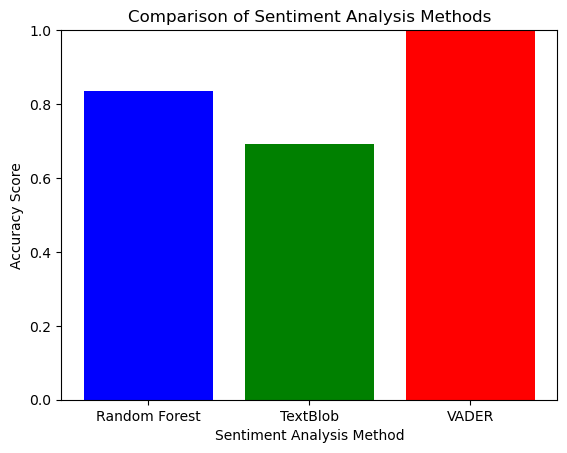

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
from sklearn.metrics import accuracy_score
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Load the IMDb dataset from a CSV file
df = pd.read_csv('IMDB Dataset.csv')

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['review'], df['sentiment'], test_size=0.2, random_state=42)

# Create a CountVectorizer to convert text data into numerical features
vectorizer = CountVectorizer(max_df=0.85, min_df=0.01, stop_words='english')

X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vectorized, y_train)
y_pred_rf = rf_classifier.predict(X_test_vectorized)

# Calculate Random Forest accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Define a function for sentiment analysis using TextBlob
def analyze_sentiment_with_textblob(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "positive"
    elif sentiment < 0:
        return "negative"
    else:
        return "neutral"

# Apply TextBlob sentiment analysis to the IMDb dataset
y_pred_textblob = [analyze_sentiment_with_textblob(text) for text in X_test]

# Calculate TextBlob accuracy
textblob_accuracy = accuracy_score(y_test, y_pred_textblob)

# Initialize VADER SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Calculate VADER sentiment scores and classify
df['VADER_Sentiment'] = df['sentiment'].apply(lambda x: analyzer.polarity_scores(x))
threshold = 0.1  # Define a threshold for VADER sentiment classification
df['VADER_Label'] = df['VADER_Sentiment'].apply(lambda x: 'positive' if x['compound'] >= threshold else 'negative' if x['compound'] <= -threshold else 'neutral')

# Calculate VADER accuracy
y_test_vader = df.loc[y_test.index]['VADER_Label']
vader_accuracy = accuracy_score(y_test, y_test_vader)

# Create a bar plot to compare accuracy scores
methods = ['Random Forest', 'TextBlob', 'VADER']
accuracy_scores = [rf_accuracy, textblob_accuracy, vader_accuracy]

plt.bar(methods, accuracy_scores, color=['blue', 'green', 'red'])
plt.xlabel('Sentiment Analysis Method')
plt.ylabel('Accuracy Score')
plt.title('Comparison of Sentiment Analysis Methods')
plt.ylim(0, 1.0)

# Show the bar plot
plt.show()
